# 중고 자동차 데이터를 분석해보자 !

## Step1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**문제1. Colab Notebook에 kaggle API 세팅하기**

In [2]:
import os

In [3]:
#os.environ을 활용하여 Kaggle API username, key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'hyemzzzzzy'
os.environ['KAGGLE_KEY'] = '5b6b73926be8349c84585e779961ea34'

**문제2. 데이터 다운로드 및 압축 해제하기**

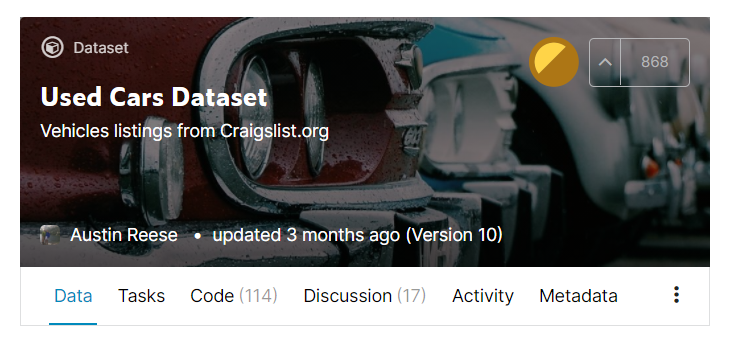

In [4]:
!rm *.*
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

rm: cannot remove '*.*': No such file or directory
 99% 261M/262M [00:10<00:00, 27.3MB/s]
100% 262M/262M [00:10<00:00, 25.4MB/s]


In [5]:
!unzip '*.zip'

Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


**문제 3. Pandas 라이브러리로 csv파일 불러오기**

In [6]:
df = pd.read_csv('vehicles.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Step 2. EDA 및 데이터 기초 통계 분석

**문제 4. 불필요한 데이터 데이터프레임에서 분석**

In [8]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [9]:
# null의 개수 확인하기
# 생각보다 스크랩핑 데이터라 그런지, 중요한 데이터인데 null인 경우가 있음 (ex,condition, paint_color)
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [10]:
# 전체적으로 아웃라이어가 잘못 들어간 경우를 확인할 수 있음
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [11]:
# 전체 컬럼 확인하기
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [12]:
# 데이터 Drop
df.drop(['id', 'url', 'region_url', 'VIN',
       'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'], axis=1, inplace=True )


In [13]:
# Drop 이후 데이터 컬럼 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  county        0 non-null       float64
dtypes: float64(3), int64(1), object(12)
memory usage: 52.1+ MB


In [14]:
 # year을 age로 변환하기 위해서 2021을 마이너스 
df['age'] = 2021 - df['year']
df.drop ('year', axis=1, inplace = True)

In [15]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,2.0
426876,wyoming,30590,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,1.0
426877,wyoming,34990,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,1.0
426878,wyoming,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,3.0


**문제5. 범주형 데이터의 통계 분석하기**


In [16]:
# 제조업체 분포 확인하기
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


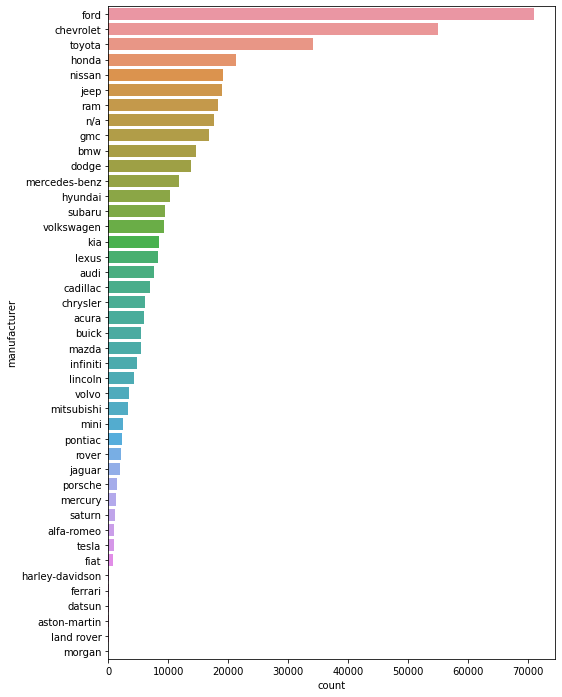

In [17]:
# 순서대로 order 하기, data 결측된 부분들 모두 'n/a'로 표현하기
fig = plt.figure(figsize=(8,12))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [18]:
# 모델과 같은 경우 어마어마하게 종류가 많다
df['model'].value_counts()

f-150                  8009
silverado 1500         5140
1500                   4211
camry                  3135
silverado              3023
                       ... 
rav4 l                    1
a4 1.8 t avant            1
xc70 t6 turbo             1
monterrey breezeway       1
g3500 express hitop       1
Name: model, Length: 29667, dtype: int64

In [19]:
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
  print(model, num)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
NISSA SENTRA 1
benz ml 350 4 matic 1
terran 1
criwn victoria 1
safari awd 1
ISUZU NPR 14FT BOX VAN,1600LB LIFT GATE,  3.0L TURBO DIESEL 1
highlander le plus 1
wrangler se 2dr 4x4 tj 1
outback r limited 1
Acterra Full cab 1
61 Impala 1
matrix sport 1
tacoma prerunner sr5 trd 1
ESCALADE ESV PLATINUM 1
AEC Regent III RLH 1
yukon, xl, slt 1
df250 1
benz s55 1
xterra se 4dr 4x4 1
davison 4x4 1
f-250 lariat 4x4 7.3l power stroke 6 sp manual lb 1owner 1
very clean ready for work 1
150 pkup 1
cooper roadster 1
panel 3800 1
c/30 1
c4500 4x4 service tru 1
rogue sl hybrid awd 1
4-door sedan 1
Cherolet 3500 Cheyenne 1
tacoma sr5 trd *one 1
c-class c 450 amg 1
wrangler willys edition 1
merceds benz cls500 1
patrol 1
e90 m3 1
expedition el limited dvd 1
sierra sle*v8,5.3l*lifted*n 1
f150 regular cab long bed 1
v60 polestar r-design 1
xlt 1
328d xdrive awd navi sport heated wheel and seats pano harmon 1
Landou 1
xt5 luxury premium 1
g6 convertible 1
a4 s line se 2.

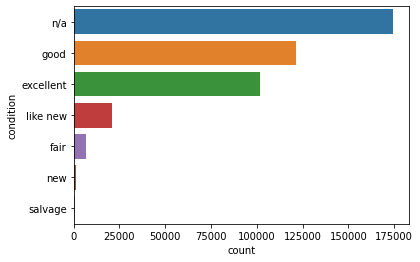

In [20]:
# 순서대로 order 하기, data 결측된 부분들 모두 'n/a'로 표현하기

sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

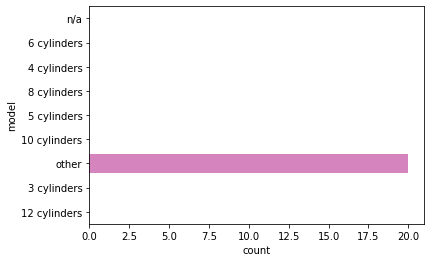

In [21]:
# 순서대로 order 하기, data 결측된 부분들 모두 'n/a'로 표현하기

sns.countplot(y='model', data=df.fillna('cylinders'), order=df.fillna('n/a')['cylinders'].value_counts().index)

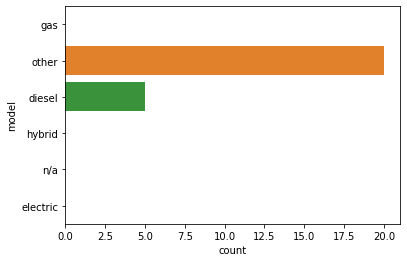

In [22]:
# 순서대로 order 하기, data 결측된 부분들 모두 'n/a'로 표현하기

sns.countplot(y='model', data=df.fillna('fuel'), order=df.fillna('n/a')['fuel'].value_counts().index)

**문제6. 수치형 데이터의 통계 분석하기**

In [23]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

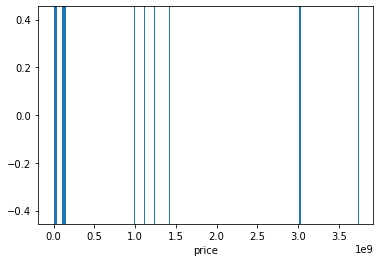

In [24]:
# 수치형 데이터 값의 범위, 기초 통계 분석하기
# 너무 넓은 범위일 때 boxplot 사용
sns.rugplot(x='price', data=df, height=2)

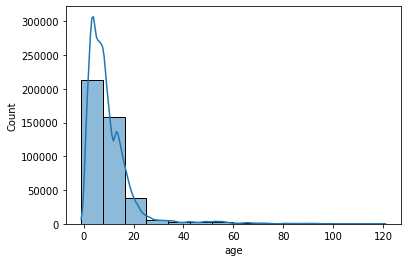

In [25]:
# 5~10년 정도의 차가 제일 많음을 확인할 수 있다.
sns.histplot(x='age', data=df, bins=14, kde=True)

### Step3. 데이터 클리닝 수행하기 

**문제7. 범주형 데이터 시각화하여 분석하기**

In [26]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

**문제8. 범주형 데이터 클리닝하기**


In [27]:
# 범주형 데이터를 아래 방법 중 적절하게 판단해서 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
# (4. Classifier를 학습해서, 결손 데이터를 추정해서 채워넣기)

In [28]:
# 결측값 -> fillna('others')로 변경
df['manufacturer'].fillna('others').value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
others             17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63


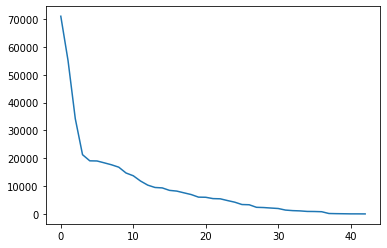

In [29]:
col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)

In [30]:
n_categorical = 10
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others') #10개 이후에 속하지 않으면 그냥 두고, 속하면 'others'로 취급하기

In [31]:
df[col].value_counts()

others       139807
ford          70985
chevrolet     55064
toyota        34202
honda         21269
nissan        19067
jeep          19014
ram           18342
gmc           16785
bmw           14699
Name: manufacturer, dtype: int64

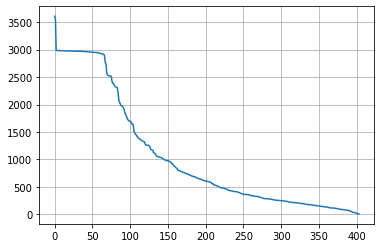

In [32]:
col = 'region'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [33]:
n_categorical = 5
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others') #10개 이후에 속하지 않으면 그냥 두고, 속하면 'others'로 취급하기

In [35]:
# 상위 5개 제외하고 others
df[col].value_counts()

others                     410754
columbus                     3608
jacksonville                 3562
spokane / coeur d'alene      2988
eugene                       2985
orlando                      2983
Name: region, dtype: int64

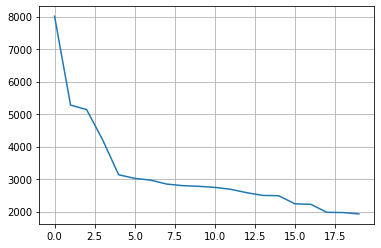

In [37]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts[:20])), counts[:20])